## Algoritmo genético simple
Andrés Quintero Bedoya

In [1]:
#Se importan librerías necesarias para trabajar el algoritmo
import random
import numpy as np

def crear_referencia(tamano_cromosoma):
    
    unos = int(tamano_cromosoma / 2) #Cantidad de unos

    # Se crea un arreglo con igual cantidad de ceros y unos
    array_referencia = np.zeros(tamano_cromosoma)
    array_referencia[0: unos] = 1

    # Se mezclan los ceros y los unos aleatoriamente en el arreglo
    np.random.shuffle(array_referencia)
    
    return array_referencia

In [2]:
# Imprimimos un ejemplo con el método anterior
print(crear_referencia(60))

[0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.]


In [3]:
def crear_poblacion_inicial(individuos, tamano_cromosoma):
    # Se configura un arreglo inicial de ceros
    poblacion = np.zeros((individuos, tamano_cromosoma))
    # Iteramos
    for i in range(individuos):
        # Se elige un numero aleatorio de unos
        unos = random.randint(0, tamano_cromosoma)
        # Cambiar el numero requerido de ceros a unos
        poblacion[i, 0:unos] = 1
        # Mezclar los ceros y unos en la fila
        np.random.shuffle(poblacion[i])
    
    return poblacion

In [4]:
#Imprimimos un ejemplo con la población inicial
print (crear_poblacion_inicial(8, 20))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.]]


In [5]:
def calcular_aptitud(referencia, poblacion):
    # Se crea un array de TRUE o FALSE que se compara la población con la referencia
    comparacion = poblacion == referencia
    # SSe suma el numero de genes que son idénticos a la referencia
    puntajes_de_aptitud = comparacion.sum(axis=1)
    
    return puntajes_de_aptitud

In [6]:
#Ahora teniendo en cuenta todo lo anterior:
referencia = crear_referencia(40)
print ('Solucion de referencia:', referencia)
poblacion = crear_poblacion_inicial(30, 40)
print ('Poblacion inicial:', poblacion)
puntajes = calcular_aptitud(referencia, poblacion)
print('Puntajes:', puntajes)


('Solucion de referencia:', array([0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1.]))
('Poblacion inicial:', array([[1., 0., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 0., 1., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 0.]]))
('Puntajes:', array([19, 19, 19, 22, 19, 23, 22, 20, 18, 20, 20, 18, 17, 21, 20, 19, 18,
       18, 21, 24, 24, 21, 22, 21, 20, 13, 18, 23, 22, 18]))


In [7]:
def seleccion_individual_por_torneo(poblacion, puntajes):
    #Se obtiene el tamaño de la poblacion
    tamano_pob = len(puntajes)
    
    #Se eligen individuos para luchar
    luchador_1 = random.randint(0, tamano_pob-1)
    luchador_2 = random.randint(0, tamano_pob-1)
    
    #Se obtienen las aptitudes para cada luchador
    aptitud_luchador_1 = puntajes[luchador_1]
    aptitud_luchador_2 = puntajes[luchador_2]
    
    # Se identifica el luchador con mayor aptitud
    # El luchador 1 ganará si hay empate en la aptitud
    if aptitud_luchador_1 >= aptitud_luchador_2:
        ganador = luchador_1
    else:
        ganador = luchador_2
    
    # Retorna los cromosomas del ganador
    return poblacion[ganador, :]

In [8]:
# Configuramos la poblacion
referencia = crear_referencia(20)
poblacion = crear_poblacion_inicial(12, 20)
puntajes = calcular_aptitud(referencia, poblacion)

# Se eligen dos progenitores y se muestran
progenitor_1 = seleccion_individual_por_torneo(poblacion=poblacion, puntajes=puntajes)
progenitor_2 = seleccion_individual_por_torneo(poblacion=poblacion,puntajes=puntajes)
print (progenitor_1)
print (progenitor_2)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]


Creando hijos desde los progenitores - Cruces

In [9]:
def crear_por_cruces(progenitor_1, progenitor_2):
    # Se obtiene el tamaño de los cromosomas
    tamano_cromosoma = len(progenitor_1)
    
    # Se elige el punto de cruce, evitando los extremos de los cromosomas
    punto_de_cruce = random.randint(1,tamano_cromosoma-1)
    
    # Se crean los hijos
    # La función np.hstack une los dos arrays enviados como parámetros
    hijo_1 = np.hstack((progenitor_1[0:punto_de_cruce],
                        progenitor_2[punto_de_cruce:]))
    
    hijo_2 = np.hstack((progenitor_2[0:punto_de_cruce],
                        progenitor_1[punto_de_cruce:]))
    
    # Se retornan los hijos
    return hijo_1, hijo_2

Ahora vamos a crear una población, generar los respectivos puntajes, elegir unos progenitores, y crear hijos

In [10]:
# Crear poblacion y generar puntajes
referencia = crear_referencia(30)
poblacion = crear_poblacion_inicial(200, 30)
puntajes = calcular_aptitud(referencia=referencia, poblacion=poblacion)

# Elegir dos progenitores
progenitor_1 = seleccion_individual_por_torneo(poblacion=poblacion, puntajes=puntajes)
progenitor_2 = seleccion_individual_por_torneo(poblacion=poblacion, puntajes=puntajes)

# Se obtienen los hijos
hijo_1, hijo_2 = crear_por_cruces(progenitor_1=progenitor_1, progenitor_2=progenitor_2)

# Mostrar salidas
print ('Progenitores')
print (progenitor_1)
print (progenitor_2)
print ('Hijos')
print (hijo_1)
print (hijo_2)

Progenitores
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0.]
Hijos
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


Mutacion aleatoria de genes

In [11]:
def mutar_aleatoriamente_poblacion(poblacion, tasa_mutacion):
    
    # Aplicar mutacion aleatoria
        array_mutacion_aleatoria = np.random.random(
            size=(poblacion.shape))
        
        booleano_mutacion_aleatoria = \
            array_mutacion_aleatoria <= tasa_mutacion

        poblacion[booleano_mutacion_aleatoria] = \
        np.logical_not(poblacion[booleano_mutacion_aleatoria])
        
        # Retorna la poblacion mutada
        return poblacion

In [12]:
# Crear poblacion y generar puntajes
referencia = crear_referencia(30)
poblacion = crear_poblacion_inicial(200, 30)
puntajes = calcular_aptitud(referencia=referencia, poblacion=poblacion)

# Elegir dos progenitores
progenitor_1 = seleccion_individual_por_torneo(poblacion=poblacion, puntajes=puntajes)
progenitor_2 = seleccion_individual_por_torneo(poblacion=poblacion, puntajes=puntajes)

# Se obtienen los hijos
hijo_1, hijo_2 = crear_por_cruces(progenitor_1=progenitor_1, progenitor_2=progenitor_2)
poblacion = np.stack((hijo_1, hijo_2))

# Mutate population
tasa_mutacion = 0.25
print ("Poblacion antes de la mutacion")
print (poblacion)
poblacion = mutar_aleatoriamente_poblacion(poblacion=poblacion, tasa_mutacion=tasa_mutacion)
print ("Poblacion despues de la mutacion")
print (poblacion)

Poblacion antes de la mutacion
[[0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
  0. 0. 0. 0. 1. 1.]]
Poblacion despues de la mutacion
[[0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.
  0. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
  0. 0. 1. 0. 1. 0.]]


Ahora mezclando todo, el algoritmo es el siguiente:

Mejor puntaje inicial, porcentaje objetivo: 0.0
Mejor puntaje final, porcentaje objetivo: 100.0


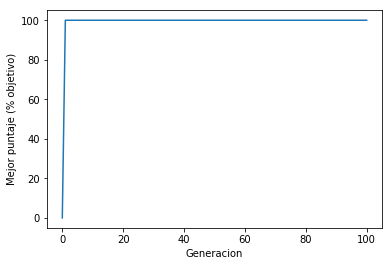

In [13]:
# Configurar parámetros generales
tamano_cromosoma = 5
tamano_poblacion = 32
generacion_maxima = 100
progreso_mejores_puntajes = [] # Sigue el progreso

# Crear la referencia
referencia = crear_referencia(tamano_cromosoma=tamano_cromosoma)

# Crear poblacion inicial
poblacion = crear_poblacion_inicial(individuos=tamano_poblacion, tamano_cromosoma=tamano_cromosoma)

# Calcular los mejores puntajes en la poblacion inicial
puntajes = calcular_aptitud(referencia=referencia, poblacion=poblacion)
mejor_puntaje = np.max(puntajes)/tamano_cromosoma * 100
print ('Mejor puntaje inicial, porcentaje objetivo: %.1f' %mejor_puntaje)

# Agregar a la lista de los mejores puntajes
progreso_mejores_puntajes.append(mejor_puntaje)
iteracion = 1
# Ahora vamos a iterar en cada generacion
for generacion in range(generacion_maxima):
    # Crear una lista vacia para la nueva poblacion
    nueva_poblacion = []
    
    # Crear una nueva poblacion creando 2 hijos al mismo tiempo
    for i in range(int(tamano_poblacion/2)):
        progenitor_1 = seleccion_individual_por_torneo(poblacion=poblacion, puntajes=puntajes)
        progenitor_2= seleccion_individual_por_torneo(poblacion=poblacion, puntajes=puntajes)
        hijo_1, hijo_2 = crear_por_cruces(progenitor_1=progenitor_1, progenitor_2=progenitor_2)
        nueva_poblacion.append(hijo_1)
        nueva_poblacion.append(hijo_2)
    
    # Reemplazar la poblacion vieja con la nueva poblacion
    poblacion = np.array(nueva_poblacion)
    
    # Aplicar la mutacion
    tasa_mutacion = 0.0003
    poblacion = mutar_aleatoriamente_poblacion(poblacion=poblacion, tasa_mutacion=tasa_mutacion)

    # Calcular el mejor puntaje
    puntajes = calcular_aptitud(referencia=referencia, poblacion=poblacion)
    mejor_puntaje = np.max(puntajes)/tamano_cromosoma * 100
    progreso_mejores_puntajes.append(mejor_puntaje)
    #Imprimir mejor puntaje de cada iteracion
    #print ('Mejor puntaje iteracion ',iteracion, ', porcentaje objetivo: %.1f' %mejor_puntaje)
    iteracion +=1

# El algoritmo genetico ha llegado a la generación limite
print ('Mejor puntaje final, porcentaje objetivo: %.1f' %mejor_puntaje)

# Dibujar progreso
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(progreso_mejores_puntajes)
plt.xlabel('Generacion')
plt.ylabel('Mejor puntaje (% objetivo)')
plt.show()